In [1]:
# Define a sample tree structure for testing
class TreeNode:
    def __init__(self, name):
        self.name = name
        self.clades = []  # Child nodes
        self.position = None

# Create a sample tree
root = TreeNode("Root")
A = TreeNode("A")
B = TreeNode("B")
C = TreeNode("C")
D = TreeNode("D")
E = TreeNode("E")

root.clades = [A, B]
A.clades = [C, D]
B.clades = [E]

# Define the calc_node_positions function
def calc_node_positions(tree, x_start, x_end, y_start, y_step):
    if not tree.clades:  # Terminal node
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:  # Internal node
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in tree.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    tree.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(root, 0, 1, 0, y_step)

# Print positions for each node
for node in [root, A, B, C, D, E]:
    print(f"Node {node.name}: Position = {node.position}")


Node Root: Position = (0.5, 1.5)
Node A: Position = (0.5, 1.0)
Node B: Position = (0.75, 2.5)
Node C: Position = (0, 0)
Node D: Position = (0, 1)
Node E: Position = (0.5, 2)


In [3]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Create a sample tree using the Phylo.BaseTree.Tree class
tree = Phylo.BaseTree.Tree()
root = tree.clade
A = root.clade
B = root.clade
C = A.clade
D = A.clade
E = B.clade

# Define the calc_node_positions function
def calc_node_positions(tree, x_start, x_end, y_start, y_step):
    if not tree.clades:  # Terminal node
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:  # Internal node
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in tree.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    tree.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(root, 0, 1, 0, y_step)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(8, 6))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree)

# Plot nodes as points
for node in [root, A, B, C, D, E]:
    if node.position:
        x, y = node.position
        ax_tree.plot(x, y, 'bo', markersize=8, label=node.name)

# Set axes limits
ax_tree.set_xlim(0, 1)
ax_tree.set_ylim(0, max(node.position[1] for node in [A, B, C, D, E]) + 1)

# Add legend
ax_tree.legend()

# Show the plot
plt.title("Phylogenetic Tree with Node Positions")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()


AttributeError: 'Clade' object has no attribute 'clade'

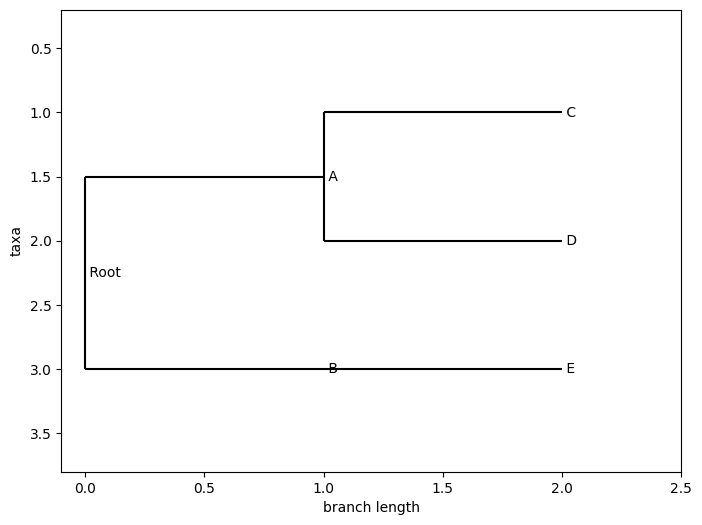

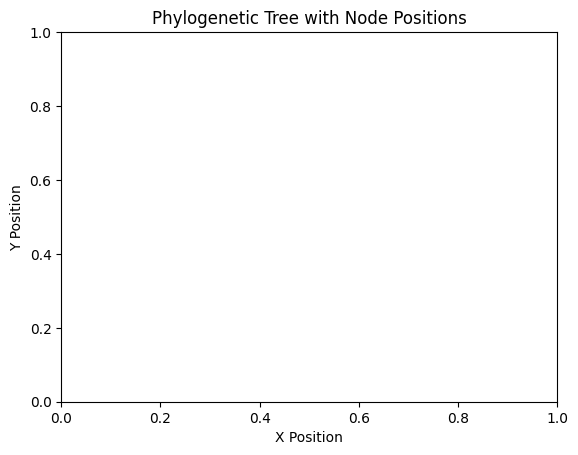

In [9]:
import matplotlib.pyplot as plt
from Bio import Phylo
from Bio.Phylo.BaseTree import Clade

# Create the tree structure
root = Clade(name="Root")
A = Clade(name="A")
B = Clade(name="B")
C = Clade(name="C")
D = Clade(name="D")
E = Clade(name="E")

# Construct the tree structure
root.clades.append(A)
root.clades.append(B)
A.clades.append(C)
A.clades.append(D)
B.clades.append(E)

tree = Phylo.BaseTree.Tree(root)

# Define the calc_node_positions function
def calc_node_positions(clade, x_start, x_end, y_start, y_step):
    if not clade.clades:  # Terminal node
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:  # Internal node
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in clade.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    clade.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(root, 0, 1, 0, y_step)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(8, 6))

# Plot the tree
Phylo.draw(tree, do_show=True, axes=ax_tree)

# Plot nodes as points
for node in [root, A, B, C, D, E]:
    if hasattr(node, 'position'):
        x, y = node.position
        ax_tree.plot(x, y, 'bo', markersize=8, label=node.name)

# Set axes limits
ax_tree.set_xlim(0, 1)
ax_tree.set_ylim(0, max(node.position[1] for node in [root, A, B, C, D, E]) + 1)

# Add legend
ax_tree.legend()

# Show the plot
plt.title("Phylogenetic Tree with Node Positions")
plt.xlabel("X Position")
plt.ylabel("Y Position")
#plt.grid(True)
plt.show()


C:\Users\forc2101\AppData\Local\Temp\ipykernel_15492\2184516605.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_tree.legend()


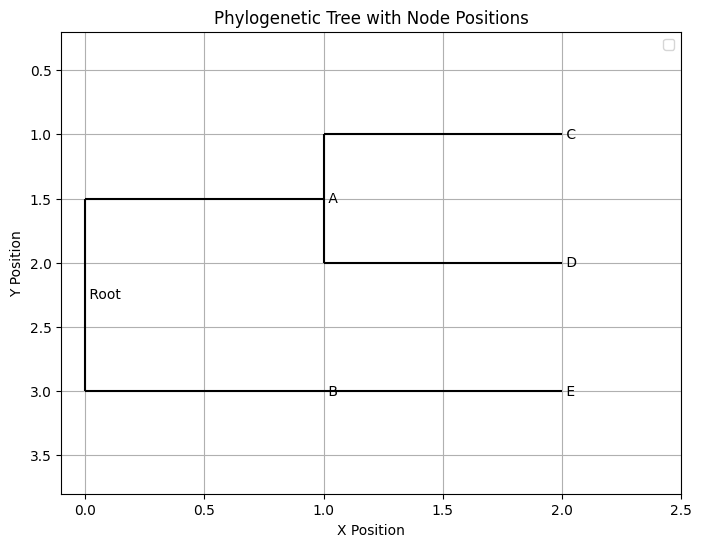

In [11]:
import matplotlib.pyplot as plt
from Bio import Phylo
from Bio.Phylo.BaseTree import Clade

# Create the tree structure
root = Clade(name="Root")
A = Clade(name="A")
B = Clade(name="B")
C = Clade(name="C")
D = Clade(name="D")
E = Clade(name="E")

# Construct the tree structure
root.clades.append(A)
root.clades.append(B)
A.clades.append(C)
A.clades.append(D)
B.clades.append(E)

tree = Phylo.BaseTree.Tree(root)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(8, 6))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree)

# Function to get coordinates of nodes from the axes
def get_node_coordinates(tree, ax):
    node_coords = {}
    for clade in tree.find_clades():
        if hasattr(clade, 'label'):
            node = clade.label
        else:
            node = clade.name

        for artist in ax.get_children():
            if isinstance(artist, plt.Text):
                if artist.get_text() == node:
                    node_coords[clade] = (artist.get_position())
                    break

    return node_coords

# Get coordinates of all nodes
coords = get_node_coordinates(tree, ax_tree)

# Plot nodes as points
for node, (x, y) in coords.items():
    ax_tree.plot(x, y, 'bo', markersize=8, label=node.name)

# Add legend
ax_tree.legend()

# Show the plot
plt.title("Phylogenetic Tree with Node Positions")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()


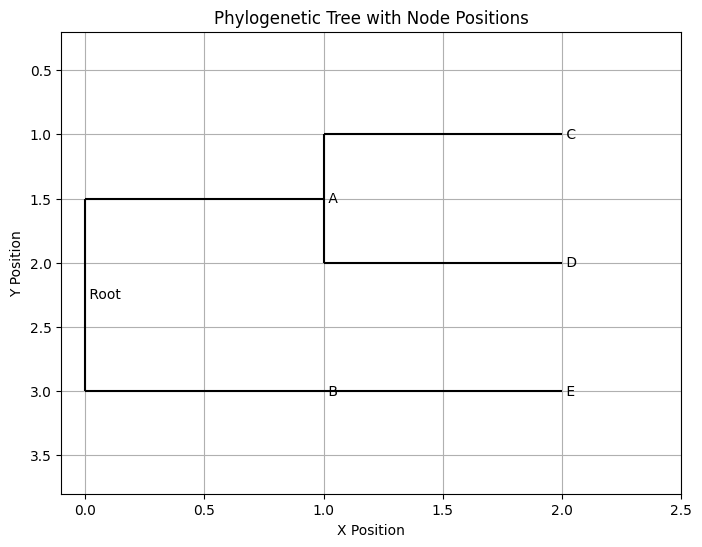

In [12]:
import matplotlib.pyplot as plt
from Bio import Phylo
from Bio.Phylo.BaseTree import Clade

# Create the tree structure
root = Clade(name="Root")
A = Clade(name="A")
B = Clade(name="B")
C = Clade(name="C")
D = Clade(name="D")
E = Clade(name="E")

# Construct the tree structure
root.clades.append(A)
root.clades.append(B)
A.clades.append(C)
A.clades.append(D)
B.clades.append(E)

tree = Phylo.BaseTree.Tree(root)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(8, 6))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree)

# Function to get coordinates of nodes from the plot elements
def get_node_coordinates(tree, ax):
    node_coords = {}
    for clade in tree.find_clades():
        for artist in ax.get_children():
            if isinstance(artist, plt.Text):
                if artist.get_text() == clade.name:
                    node_coords[clade] = artist.get_position()
                    break
    return node_coords

# Get coordinates of all nodes
coords = get_node_coordinates(tree, ax_tree)

# Plot nodes as points
for node, (x, y) in coords.items():
    ax_tree.plot(x, y, 'bo', markersize=8)

# Show the plot
plt.title("Phylogenetic Tree with Node Positions")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()


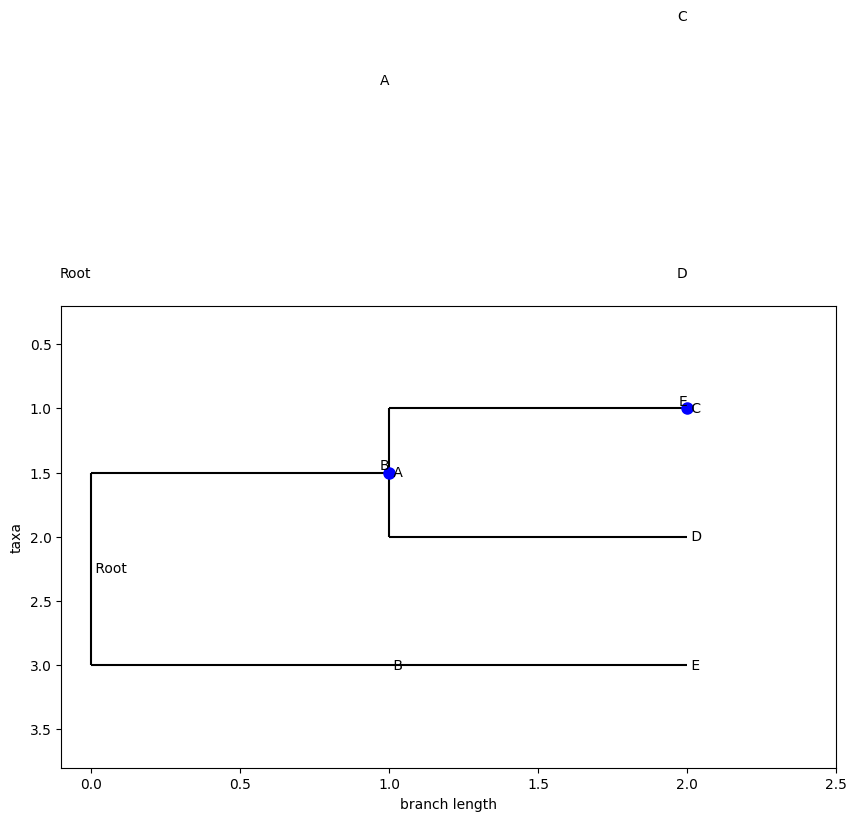

In [15]:
import matplotlib.pyplot as plt
from Bio import Phylo
from Bio.Phylo.BaseTree import Clade

# Create a sample tree structure
root = Clade(name="Root")
A = Clade(name="A")
B = Clade(name="B")
C = Clade(name="C")
D = Clade(name="D")
E = Clade(name="E")

root.clades.append(A)
root.clades.append(B)
A.clades.append(C)
A.clades.append(D)
B.clades.append(E)

tree = Phylo.BaseTree.Tree(root)

# Function to calculate node positions
def calc_node_positions(clade, x=0, y=0, y_step=1, positions=None, depths=None, current_depth=0):
    if positions is None:
        positions = {}
    if depths is None:
        depths = {}
    
    positions[clade] = (x, y)
    depths[current_depth] = depths.get(current_depth, 0) + 1
    
    if clade.clades:
        num_children = len(clade.clades)
        for i, child in enumerate(clade.clades):
            calc_node_positions(child, x + 1, y - y_step * (num_children - 1) + i * 2 * y_step, y_step, positions, depths, current_depth + 1)
    
    return positions, depths

# Calculate positions
positions, depths = calc_node_positions(tree.root)

# Normalize y positions based on depth
max_depth = max(depths.keys())
for depth in depths.keys():
    scale = len(depths) / depths[depth]
    for clade, (x, y) in positions.items():
        if x == depth:
            positions[clade] = (x, y * scale)

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 6))
Phylo.draw(tree, do_show=False, axes=ax)

# Overlay node positions
for clade, (x, y) in positions.items():
    ax.plot(x, y, 'bo', markersize=8)
    if clade.name:
        ax.text(x, y, clade.name, verticalalignment='bottom', horizontalalignment='right')

# Show the plot
plt.show()
